<h1>
    <br style ="color:#EA7600"> UCL </br> 
    </p>
</h1>

<div>

  <h4>
      <p style="font-size:18pt">COMP0198 Machine Learning with Applications in Finance</p>
      <p style="font-size:18pt">Week 5</p>
  </h4>

</div>

# Table of Contents
* [1. Support Vector Machine](#1.-Support-Vector-Machine)
    * [1.1 SVM cost function](#1.1-SVM-cost-function)
    * [1.2 Find the support vectors](#1.2-Find-the-support-vectors)
* [2. Linear SVM Classification](#2.-Linear-SVM-Classification)
    * [2.1 Soft Margin Classification](#2.1-Soft-Margin-Classification)
* [3. Nonlinear SVM Classification](#3.-Nonlinear-SVM-Classification)
    * [3.1 Polynomial Kernel](#3.1-Polynomial-Kernel)
    * [3.2 Similarity Features](#3.2-Similarity-Features)
    * [3.3 Gaussian RBF Kernel](#3.3-Gaussian-RBF-Kernel)
* [4. SVM Regression](#4.-SVM-Regression)

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

Let's import the libraries we will need for this week's lab and verify that we have the correct versions:

In [2]:
# scipy
import scipy
print("scipy: %s"  % scipy.__version__)
# numpy
import numpy
print("numpy: %s"  % numpy.__version__)
# matplotlib
import matplotlib
print( "matplotlib: %s"  % matplotlib.__version__)
# pandas
import pandas
print( "pandas: %s"  % pandas.__version__)
# statsmodels
import statsmodels
print( "statsmodels: %s"  % statsmodels.__version__)
# scikit-learn
import sklearn
print( "sklearn: %s"  % sklearn.__version__)

scipy: 1.9.3
numpy: 1.23.4
matplotlib: 3.6.1
pandas: 1.5.1
statsmodels: 0.13.2
sklearn: 1.1.2


If we get an error of type: `ModuleNotFoundError`, we can install the missing library by running:

- !pip install nameOfMissingLibrary

It also requires Scikit-Learn ≥ 1.0.1:

In [111]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [110]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/svm` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [109]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Support Vector Machine

Support Vector Machine is a supervised learning algorithm that can be used for both classification and regression problems. However, it is mostly used in classification problems in the industry. It is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is well suited for classification of complex but small- or medium-sized datasets. 

The main idea of SVM is to fit the widest possible street (represented by the parallel dashed lines called margins in the next image) between the classes. This is the optimal hyperplane that maximizes the margin between the two classes. In other words, SVM is a maximum margin classifier. For example, if we are trying to classify two classes of data points, SVM will find the optimal hyperplane among all the possible hyperplanes that separates the two classes with the largest margin:

<img src="./figures/svm1.png" width="60%">

and from all of these hyperplanes, SVM will choose the one that has the largest/maximum margin or the maximum distance between data points of both classes:

<img src="./figures/svm2.png" width="60%">

The support vectors in the image above are the data points that are closest to the hyperplane. These data points are the ones that define the position of the hyperplane. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

The **distance between the support vectors and the hyperplane is called the margin**. The goal of SVM is to find the **hyperplane with the largest margin**. The hyperplane with the largest margin is called the **optimal hyperplane**. The optimal hyperplane is the one that **best generalizes the data**. 

### 1.1 SVM cost function

<img src="./figures/svm.jpeg" width="60%">


The SVM cost function is the same as the cost function of linear regression, but with a twist. The SVM cost function tries to minimize the width of the street while limiting margin violations (i.e., instances that end up in the middle of the street or on the wrong side). During training, the idea is finding the weights vector $w$ and the bias term $b$ that make the street, or margin, as wide as possible while limiting the number of margin violations. 

To make the street larger, to make it larger, we need to make $w$ smaller. **The borders of the street would be the points where the decision function is equal to –1 or +1**. The bias term **b** has no influence on the size of the margin: tweaking it just shifts the margin around, without affecting its size. So, we can ignore it when we compute the width of the margin and find it through is derivative:

$$-C \cdot t$$

where $t$ is the target class (-1 or 1) and $C$ is the hyperparameter that controls the trade-off between the width of the street and the number of margin violations.

The smaller the weight vector $w$ is, the larger the margin will be. So, we need to find a good balance between having a large margin and limiting the margin violations. This is the trade-off that the SVM cost function is trying to minimize. The cost function is:

$$
\begin{align}
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} w^2 + C \frac{1}{m}\sum_{i=1}^{m} \max(0, 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b))
\end{align}
$$

where:
- $w$ is the vector of feature weights
- $w^T$ is the transpose of $w$
- $b$ is the bias term
- $C$ is the regularization hyperparameter 
- $m$ is the number of instances in the training set. 
- $y^{(i)}$ is the target class of the $i^{th}$ instance
- $x^{(i)}$ is the feature vector of the $i^{th}$ instance or the $i^{th}$ row of the training set
- $w^T \cdot x^{(i)} + b$ is the decision function of the $i^{th}$ instance
- $\max(0, 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b))$ is the hinge loss of the $i^{th}$ instance

The first term on the right-hand side of the equation is the usual MSE cost function that linear regression tries to minimize. The second term is called the **hinge loss**. The **hinge loss** is equal to zero when the model makes the correct prediction, and it is equal to the margin violation if the prediction is wrong. 

The hyperparameter $C$ controls the trade-off between these two terms. If $C$ is small, then the margin is wide and there are many margin violations. If $C$ is large, then the margin is narrow and there are fewer margin violations.

To train our SVM, we are going to use gradient descent to minimize the **hinge loss**:

$$
L = \sum_{i=1}^{n} \max(0, 1 - y_i(\mathbf{w}^T \mathbf{x}_i + b))
$$

where:

- $y^{(i)}$ is the target class of the $i^{th}$ instance
- $x^{(i)}$ is the feature vector of the $i^{th}$ instance or the $i^{th}$ row of the training set
- $\theta^T \cdot x^{(i)} + b$ is the decision function of the $i^{th}$ instance
- $\max(0, 1 - y^{(i)}(\theta^T \cdot x^{(i)} + b))$ is the hinge loss of the $i^{th}$ instance

and the above could be rewritten as:

$$
1 - y_i \cdot w^T \cdot x - b \cdot y_i
$$

The Hinge Loss is a piecewise linear function that is **zero** for $y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1$. This means that there is no misclassification, meaning that **our model correctly predicts the class for our data point**.

When $y_i(\mathbf{w}^T \mathbf{x}_i + b) < 1$, it means that there is misclassification, meaning that **our model incorrectly predicts the class for our data point** and we need to update our weights and bias to minimize the loss.

### 1.2 Find the support vectors

So, we need the decision function to be greater than 1 for all positive training instances and lower than –1 for negative training instances. If we define $t^{(i)} = –1$ (when $y^{(i)} = 0$) and $t^{(i)} = 1$ for positive instances (when $y^{(i)} = 1$) then we can write this constraint as:

$$
t^{(i)}(\theta^T \cdot x^{(i)} + b) \geq 1
$$

where:
- $t^{(i)}$ is the target class of the $i^{th}$ instance
- $x^{(i)}$ is the feature vector of the $i^{th}$ instance or the $i^{th}$ row of the training set
- $\theta^T \cdot x^{(i)} + b$ is the decision function of the $i^{th}$ instance
- $b$ is the bias term
- $1$ is the margin

Then, the dependent variable y takes the form -1 or 1 instead of the usual 0 or 1. So, given a vector x of features and the corresponding binary label y in {-1, 1}, the decision function is:

$$
\begin{align}
s \text{ or } d = w^⊺ \cdot x + b
\end{align}
$$


where:
- $w$ is the weight vector
- $b$ is the bias term
- $x$ is the feature vector
- $d$ is the decision function

The instances closer to 1 or –1 are called **support vectors**. The decision boundary is the line that goes through the middle of the street. It is fully determined (defined) by the two support vectors. The decision boundary is perpendicular to the line that connects the two support vectors. The distance between the decision boundary and the closest support vector is called the **margin**.

Then, given an instance $x$ of the positive class (i.e., with $t = 1$), the loss is $0$ if the output $s$ of the decision function ($s = w^⊺ x + b$) is greater than or equal to $1$. This happens when the instance is off the street and on the positive side. Given an instance of the negative class (i.e., with $t = –1$), the loss is $0$ if $s ≤ –1$.

After finding the support vectors, we can find the optimal hyperplane by computing the equation of the hyperplane that passes through the support vectors. This is called the **maximum margin hyperplane** (or just the **margin hyperplane**). The margin hyperplane is the hyperplane that separates the two classes and that is as far away from the closest training instances as possible. This is called the **maximum margin classifier**. The formula of the **maximum margin classifier** is:

$$
\begin{align}
\hat{y} = \begin{cases}
0 & \text{if } w^T \cdot x + b \leq -1 \\
1 & \text{if } w^T \cdot x + b \geq 1
\end{cases}
\end{align}
$$

where:
- $w$ is the weight vector
- $b$ is the bias term
- $x$ is the feature vector
- $\hat{y}$ is the predicted class

and the above means that $\hat{y}$:

$$
\begin{align}
\hat{y} = \begin{cases}
+1 & \text{for + samples} \\
-1 & \text{for - samples}
\end{cases}
\end{align}
$$

Then, we can simplify the constraints down to a single equation:

$$
(w^T \cdot x + b) - 1 = 0
$$

where:
- $w$ is the weight vector
- $b$ is the bias term
- $x$ is the feature vector
- $1$ is the margin

After training an SVM, a _support vector_ is any instance located on the "street" (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is _not_ a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won't affect the decision boundary.

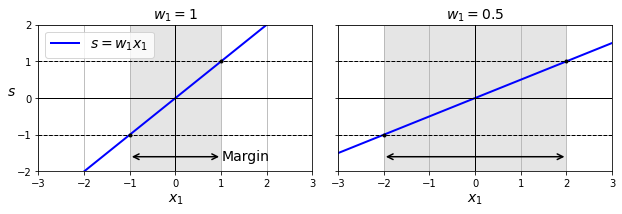

In [ ]:
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()

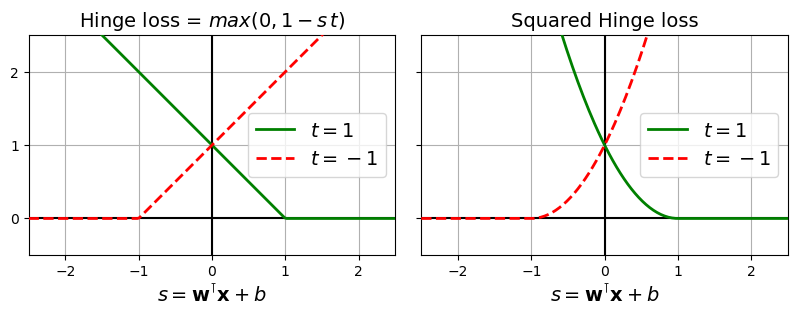

In [ ]:
s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

save_fig("hinge_plot")
plt.show()

Let's look at implementing our SVM algorithm:

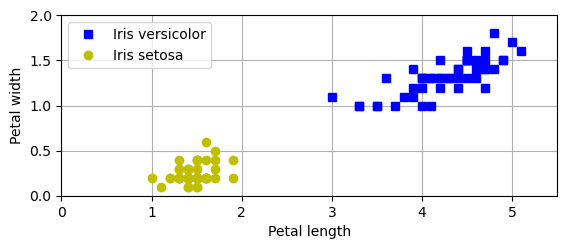

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
y = y.to_numpy()

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

In [71]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import add_dummy_feature

# add the dummy feature 1 as the first column:
# x0 = 1 to each instance
# which is equivalent to setting the intercept to 1
# Adding the dummy feature is equivalent to setting the intercept to 1 by doing:
# X_b = np.c_[np.ones(m), X]
X_b = add_dummy_feature(X)

# # Reshape y to a column vector
# y = y.reshape(-1,1)

# Let's split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().reshape(-1,1), test_size=0.2, random_state=42)

In [96]:
from sklearn.base import BaseEstimator
import numpy as np

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        """
        Learning rate schedule as a function of the epoch
        in order that the regularizing value reduces 
        as the number of epochs increases. E.g.:
        eta0 = 1, eta_d = 100, epoch = 1000

        eta1 = 1 / (1 + 100) = 0.00990099
        eta2 = 1 / (2 + 100) = 0.009803922
        eta3 = 1 / (3 + 100) = 0.009708738

        """
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization of weights using a random seed
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        
        # Initialize the bias term or intercept to 0
        b = 0

        # Transform y to a column vector of labels where
        # t = -1 if y = 0 and t = 1 if y = 1
        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1

        # combine t and X into a single matrix
        X_t = X * t
        self.Js = []

        # Training using certain number of epochs
        for epoch in tqdm(range(self.n_epochs)):

            # Find the support vectors using the formula
            # s = (t * (X * w + b)) < 1
            # which becomes s = (xt * w + b * t) < 1
            # because we have already multiplied t and X          
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()

            # Get the support vectors and their labels from the matrix of X and t
            X_t_sv = X_t[support_vectors_idx]
            # print(X_t_sv)

            # Get the labels of the support vectors
            t_sv = t[support_vectors_idx]
            # print(t_sv)

            # Compute the cost function
            # using the formula
            # J = 1/2 * (w)^2 + C * (1 - sum(Xt * w) + b * t)))
            # because we have joined t and X into a single matrix
            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            # Compute the gradients of the cost function
            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)

            # Get the bias term gradient since it is not a vector but a scalar
            # and C equals 1
            b_derivative = -self.C * t_sv.sum()

            # Update the weights and bias term
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])

        # Get the final support vectors
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In the excersive above, we just implemented the Linear SVM classification algorithm. Now, let's use our implementation of the Linear SVM classification algorithm to classify the iris dataset:

In [137]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000,
                      random_state=2)
svm_clf.fit(X_train, y_train)
# svm_clf.predict(np.array([[5, 2], [4, 1]]))

y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

100%|██████████| 60000/60000 [00:02<00:00, 23021.85it/s]

Accuracy: 1.0


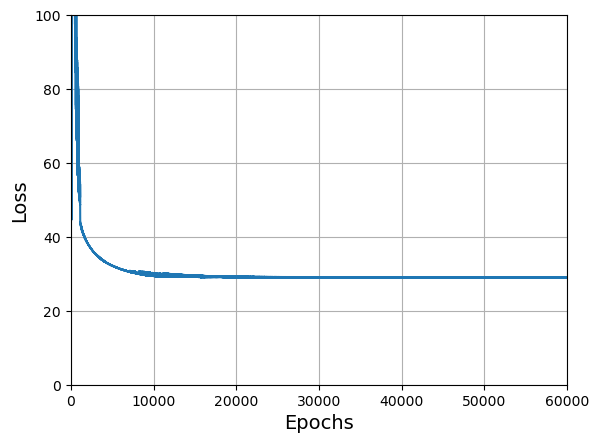

In [138]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [139]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.14296572] [[[2.23402634]
  [2.60489612]]]


In [140]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X_train, y_train.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.06934662] [[2.22117311 2.59296002]]


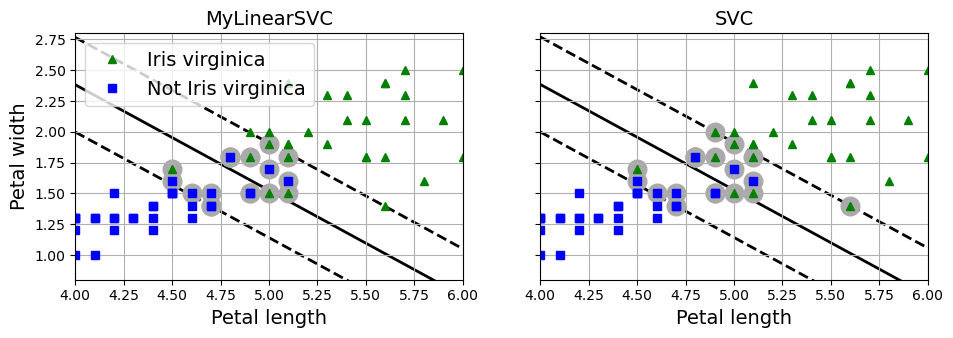

In [142]:
yr = y_train.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X_train[:, 0][yr==1], X_train[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X_train[:, 0][yr==0], X_train[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X_train[:, 0][yr==1], X_train[:, 1][yr==1], "g^")
plt.plot(X_train[:, 0][yr==0], X_train[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

# 2. Linear SVM Classification

A support vector machine (SVM) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even novelty detection. SVMs shine with **small to medium-sized nonlinear datasets (i.e., hundreds to thousands of instances)**, especially for **classification tasks**. However, they **don’t scale very well to very large datasets**, as you will see.

The LinearSVC class is based on the `liblinear` library, which implements an [optimized algorithm for linear SVMs](https://www.csie.ntu.edu.tw/~cjlin/papers/cddual.pdf).⁠ It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly $O(m × n)$. The algorithm takes longer if you require very high precision.

Using the iris dataset, let's train a linear SVM classifier and see how it fits the data:

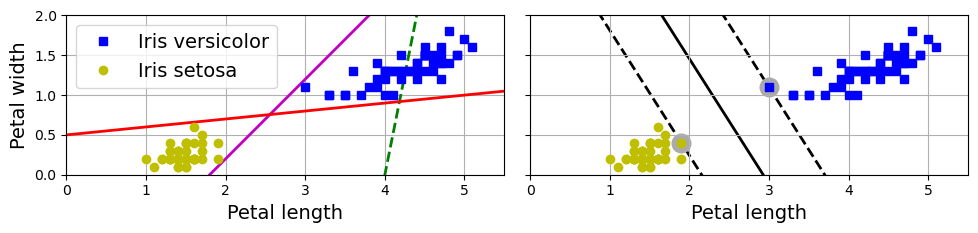

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

The **solid line in the plot on the right represents the decision boundary** of an SVM classifier. This line not only separates the two classes but also stays as far away from the closest training instances as possible. **You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes**. This is called *large margin classification*.

Notice that adding more training instances **“off the street”** will not affect the decision boundary at all: it is fully determined (or “supported”) by **the instances located on the edge of the street**. These instances are called the *support vectors*. The distance between the **support vectors** are called margins, which are also influenced only by the support vectors and that is why this method is often referred to as the *support vector machine*.

SVMs are sensitive to the feature scales. So, we are going to be using `Scikit-Learn’s StandardScaler` to standardize/scale the features. This will make the SVM classifier more efficient and less sensitive to the scale of the features:

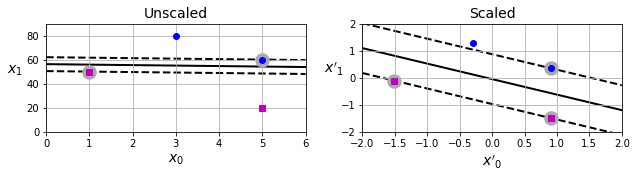

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

**SVMs try to fit the largest possible "street" between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features.** As you can see, the unscaled features are on very different scales, so the decision boundary will be very irregular. This will make it hard for the SVM to separate the classes properly. So, we need to scale the features. 

The scaled features are now on a much more reasonable scale, and the decision boundary looks much better. Let's compare the SVM classifier's predictions vs other models:

In [144]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

Let's plot the decision boundaries of these three models:

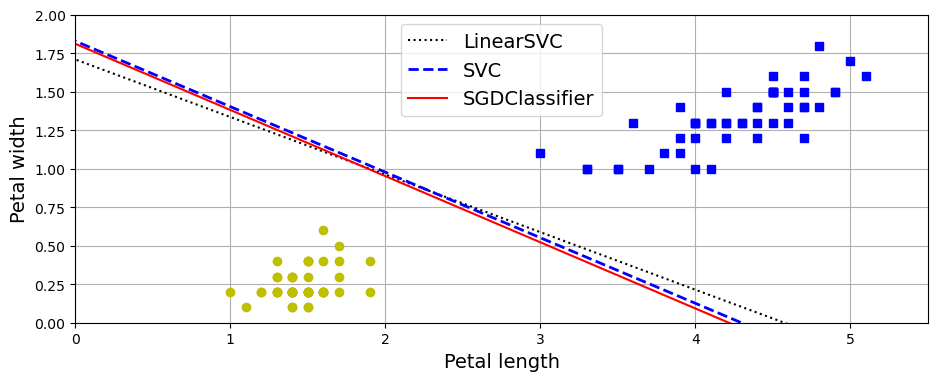

In [145]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

## 2.1 Soft Margin Classification

If we strictly impose that all instances must be off the street and on the correct side, this is called **hard margin classification.** There are two main issues with hard margin classification:

- First, it only works if the data is linearly separable. 
- Second, it is sensitive to outliers. 

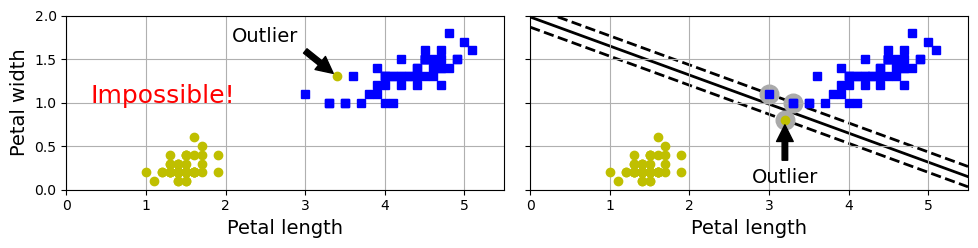

In [115]:
# extra code – this cell generates and saves Figure 5–3

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

On the left, it is impossible to find a hard margin. On the right, without the outlier, and the model will probably not generalize as well.

To avoid these issues, we need to use a more flexible model. **The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side)**. This is called **soft margin classification**.

SVM's soft margin classification is controlled by a hyperparameter `C`. A smaller `C` value leads to a wider street but more margin violations. The following code creates a linear SVM classifier with `C=1` and `C=100`:

In [116]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [117]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [118]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

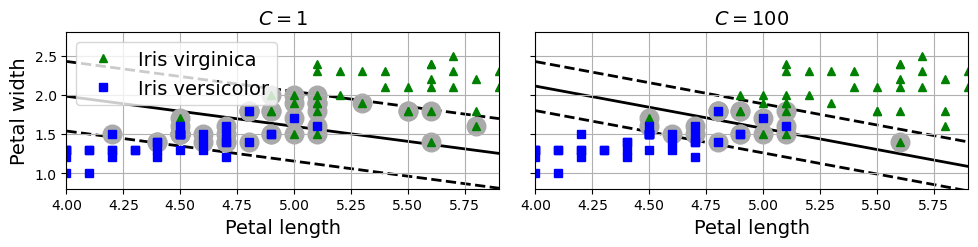

In [119]:
import matplotlib.pyplot as plt

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

Reducing `C` results in more instances supporting the street, so there’s less risk of overfitting. But if you reduce it too much, then the model ends up underfitting, as seems to be the case here: the model with `C=100` looks like it will generalize better than the one with `C=1`

# 3. Nonlinear SVM Classification

Although linear SVM classifiers are efficient and often work surprisingly well, many datasets are not even close to being linearly separable.

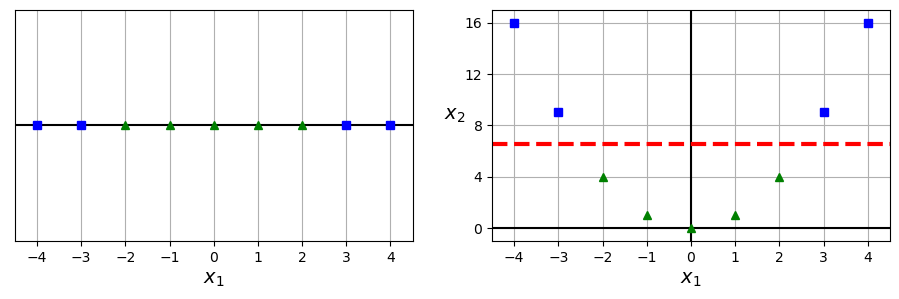

In [120]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

Consider the lefthand plot: it represents a simple dataset with just one feature, `x1`. This dataset is not linearly separable, as you can see. But if you add a second feature `x2 = (x1)2`, the resulting `2D dataset` is perfectly linearly separable.

In Scikit-Learn, we can create a `Pipeline` containing a `PolynomialFeatures` transformer (to add the extra feature) and a `StandardScaler` and a `LinearSVC`:

In [121]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

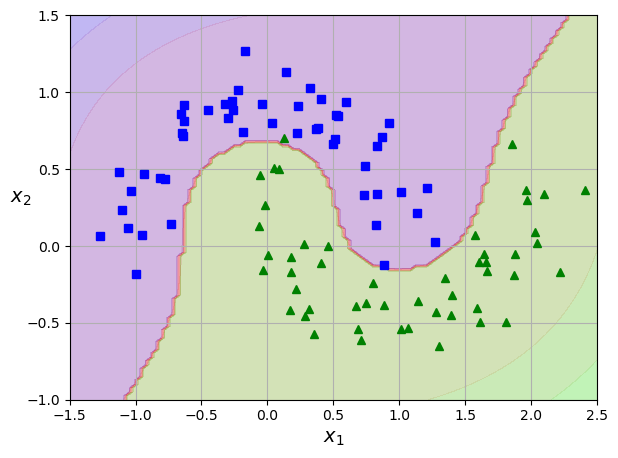

In [122]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

Adding polynomial features is simple to implement and can work great with all sorts of machine learning algorithms (not just SVMs). That said, at a **low polynomial degree** this method **cannot deal with very complex datasets**, and with a **high polynomial degree it creates a huge number of features, making the model too slow.**

## 3.1 Polynomial Kernel

You can apply the **kernel trick** to get the same result as if you added many polynomial features. The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to **mapping the inputs to another space using a nonlinear transformation**, then **training a linear SVM on the resulting high-dimensional inputs**. The kernel trick gives the same result without having to transform the inputs at all.

The most common kernels are:

- **Linear**: It is simply the dot product of the two feature vectors. It is the most common kernel and is used when the data is linearly separable.
- **Polynomial**: It is a generalization of the linear kernel. It is used when the data is not linearly separable.
- **Radial Basis Function (RBF)**: It is a generalization of the polynomial kernel. It is used when the data is not linearly separable.
- **Sigmoid**: It is a generalization of the linear kernel. It is used when the data is not linearly separable.

The formulas of the most common kernels are:

- **Linear**: $K(x, l) = x^T l$
- **Polynomial**: $K(x, l) = (x^T l + r)^d$
- **Radial Basis Function (RBF)**: $K(x, l) = exp(-\gamma ||x - l||^2)$
- **Sigmoid**: $K(x, l) = tanh(\alpha x^T l + \theta)$

where:
- $x$ and $l$ are two feature vectors.
- $d$ is the degree of the polynomial.
- $r$ is the bias term.
- $\gamma$ is the kernel coefficient.
- $\alpha$ is the kernel coefficient.
- $\theta$ is the kernel coefficient.
- $||x - l||^2$ is the squared Euclidean distance between the two feature vectors.
- $tanh$ is the hyperbolic tangent function.
- $exp$ is the exponential function.

The **kernel trick** makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. This means there’s no combinatorial explosion of the number of features. 

In [123]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

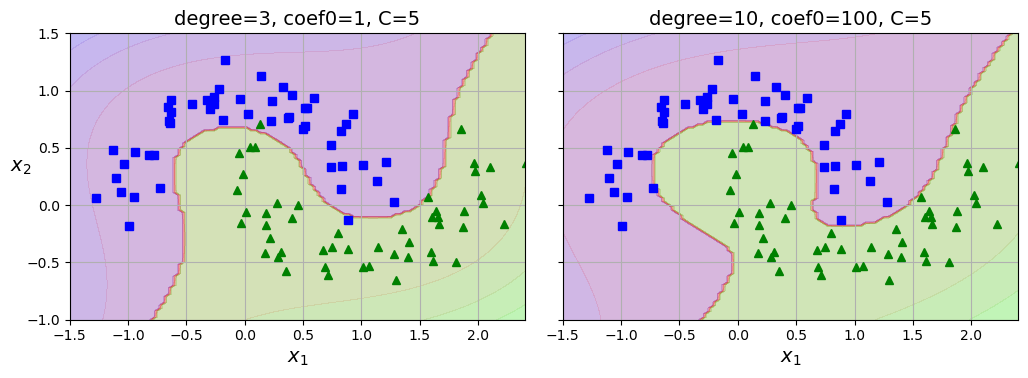

In [124]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## 3.2 Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark. For example, let’s take the 1D dataset from earlier and add two landmarks to it at `x_1 = -2` and `x_1 = 1`. Next, let’s define the similarity function to be the **Gaussian Radial Basis Function** (RBF) with $\gamma = 0.3$. This is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).

Now we are ready to compute the new features. For example, let’s look at the instance x1 = –1: it is located at a distance of 1 from the first landmark and 2 from the second landmark. Therefore, its new features are $x_2 = exp(-0.3 * 1^2) \approx 0.74$ and $x_3 = exp(-0.3 * 2^2) \approx 0.30$. The plot on the right represents the transformed dataset (dropping the original features).



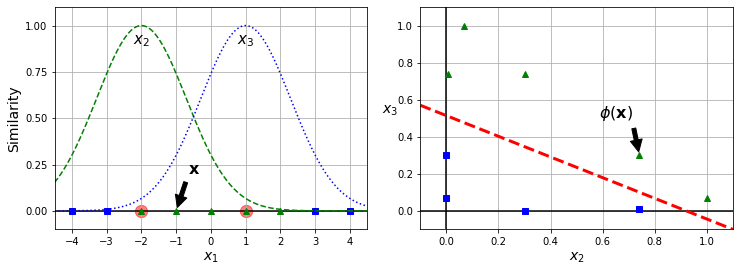

In [17]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

## 3.3 Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so:

In [125]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

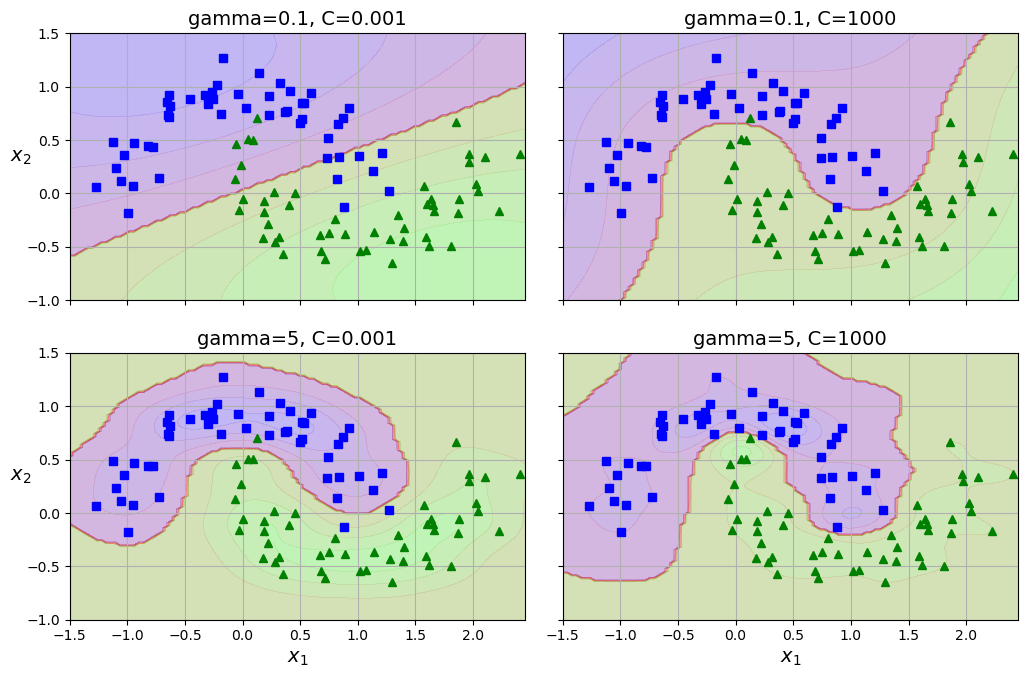

In [126]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

Increasing gamma makes the bell-shaped curve narrower (see the left plot), and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. 

Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting, you should increase it (similar to the `C` hyperparameter).

# 4. SVM Regression

To use SVMs for regression instead of classification, the trick is to tweak the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter $\epsilon$.

In [127]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

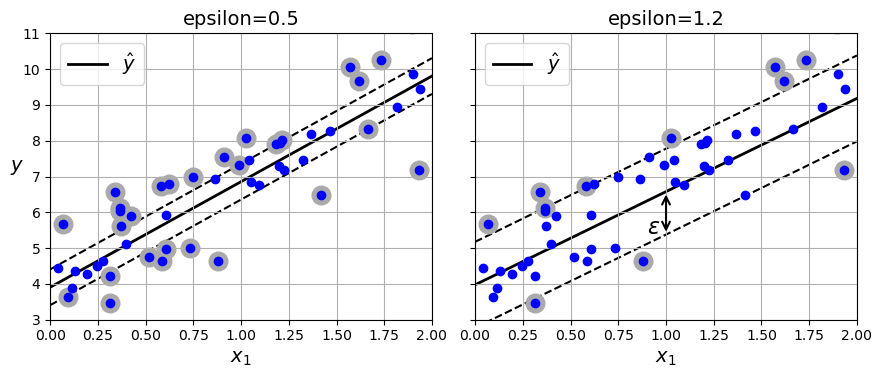

In [128]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

The figure above shows two linear SVM regression models trained on some linear data, one with a small margin (on the left) and the other with a large margin (on the right). The larger margin model makes fewer margin violations but ends up with a larger margin, which is less ideal.

Reducing $\epsilon$ increases the number of support vectors, which regularizes the model. Moreover, if you add more training instances within the margin, it will not affect the model’s predictions; thus, the model is said to be $\epsilon$-insensitive.

To tackle nonlinear regression tasks, you can use a kernelized SVM model. For example, the following code defines a `2nd-degree polynomial kernel` and uses it to train an `SVR` model on a nonlinear dataset:

In [129]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

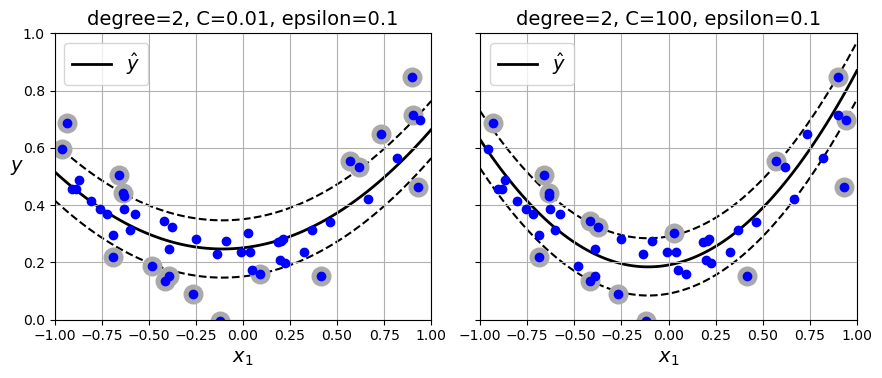

In [130]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

There is some regularization in the left plot (i.e., a small `C` value), and much less in the right plot (i.e., a large `C` value).

## Credits

- Hands-on Machine Learning with Scikit-Learn & TensorFlow, Chapter 7, 2017, Aurelien Geron

- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition , Chapter 10, 2019, Aurelien Geron

-  Geron, A. (2022) Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol: O’Reilly Media, Incorporated. [Access through UCL library.](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)

- Geron, A. (2022) Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition), Chapter 5 [Git](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)